# Over- and under-fitting your data

In [ ]:
# PHZ3150 - Spring 2022

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


## A problem you might encounter while trying to fit your data with models is under- or over- fitting them. In the first case our adopted model is too simple to constrain the data in the second case it is too complex, to the point that even noise in our observations is interpreted as part of the model.

## Over and underfitting data is bad because:
- you don't really get the underlying natural law that your data follow
- you cannot use your data and model fitting for predicting other data (Machine Learning applications)

### Let's create a random dataset we "observed"

In [2]:
x = np.linspace(0,3,30)
y = np.sin(2*x) +  np.random.random(len(x))*0.6

### and let's vizualise it:

<ErrorbarContainer object of 3 artists>

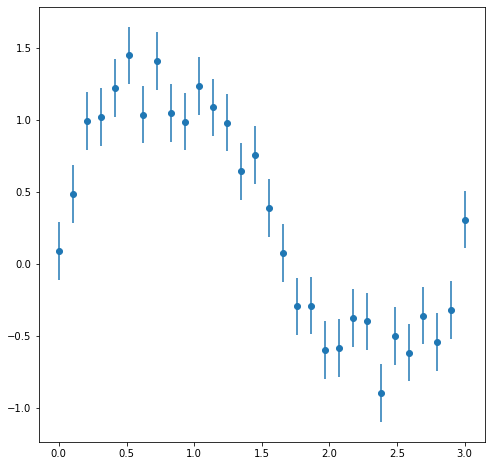

In [3]:
plt.figure( figsize = ( 8, 8 ) )
plt.errorbar( x, y, yerr = 0.2 , marker='o', linestyle = 'none')


### One of the most basic fits you could do would be a function a * x +b. Does it work here?

Text(0, 0.5, 'Y')

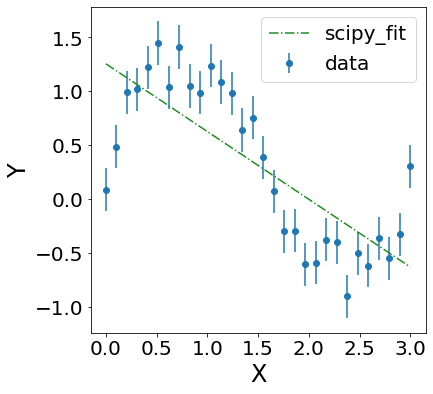

In [4]:
#Let's define our function for the line:
def my_fit_function(t, a, b):
    """fit your data with a straight line"""
    #y = a*t+b
    return b + a* t 


# call curve_fit
t2, v2 = curve_fit(my_fit_function, x , y, sigma = np.zeros(len(x))+0.2)

#plot your result: 
plt.figure( figsize = ( 6, 6 ) )

plt.errorbar( x, y, yerr = 0.2, marker = 'o', linestyle = 'none', label = 'data')
plt.plot( x, my_fit_function( x, *t2), linestyle = '-.', color = 'forestgreen', label ='scipy_fit')
plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.xlabel('X', fontsize = 24)
plt.ylabel('Y', fontsize = 24)

### This is *a* fit of the data. But, do you think it tells us the whole story? What we have done in this very simple example is that we underfitted the data: we got a fit of our data to a model, but there are clearly a lot of information about the nature of the data that our fit ignores! 

### Let's try a 7th order polynomial fit:

Text(0, 0.5, 'Y')

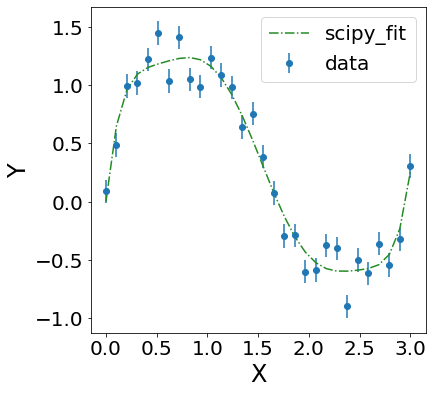

In [9]:
def my_fit_pol_function(t,  b, c, d, e, f, g, h):
    """fit your data with a 7th order polynomial"""
    #y =  b * t + c * t**2 + .... + h * t**7
    return  b * t + c * t**2 + d* t**3 + e * t**4  + f * t**5 + g * t**6 + h * t**7
#+  \
        #   i * t**8  +  j * t**9  + k * t**10. + l * t**11 + m * t**12+ n * t**13 + \
         #  o * t**14 + p * t**15. + q * t**16.


t2b, v2b = curve_fit(my_fit_pol_function, x , y, 
                        sigma = np.zeros(len(x))+0.2)


plt.figure(figsize=(6,6))

plt.errorbar( x, y, yerr = 0.1, marker = 'o', linestyle = 'none',label='data')
plt.plot( x, my_fit_pol_function(x, *t2b), linestyle = '-.', color = 'forestgreen',label ='scipy_fit')

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.xlabel( 'X', fontsize = 24 )
plt.ylabel( 'Y', fontsize = 24 )

### fit seems improved, better constrained model. Still not perfect though...Would a higher order polynomial work?

### Numpy, of course, offers a polynomial function, you don't need to make it manually: np.polyfit()
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [6]:
## trying to fit 30 points of data with a 29th order polynomial!!!
zn = np.polyfit(x, y, 29)  # calculate your coeffs
print( zn )

[-1.35095730e-03  2.09550937e-02 -1.09832075e-01  1.17996977e-01
  7.13162098e-01 -8.40958838e-01 -6.33468770e+00  1.11104513e+00
  5.54919278e+01  5.47939298e+01 -4.28126570e+02 -9.29285860e+02
  3.07979732e+03  1.02469488e+04 -2.58863196e+04 -8.88723115e+04
  3.11081020e+05  3.58152911e+05 -3.79192132e+06  1.02530020e+07
 -1.62935607e+07  1.74203720e+07 -1.30748092e+07  6.94578155e+06
 -2.57727693e+06  6.45371131e+05 -1.02214559e+05  9.03160424e+03
 -3.24201116e+02  8.87152615e-02]


C:\Users\diego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
z = np.poly1d( zn ) 
print( z )

           29           28          27         26          25
-0.001351 x  + 0.02096 x  - 0.1098 x  + 0.118 x  + 0.7132 x 
          24         23         22         21         20         19
 - 0.841 x  - 6.335 x  + 1.111 x  + 55.49 x  + 54.79 x  - 428.1 x 
          18        17             16             15             14
 - 929.3 x  + 3080 x  + 1.025e+04 x  - 2.589e+04 x  - 8.887e+04 x 
              13             12             11             10
 + 3.111e+05 x  + 3.582e+05 x  - 3.792e+06 x  + 1.025e+07 x 
              9             8             7             6             5
 - 1.629e+07 x + 1.742e+07 x - 1.307e+07 x + 6.946e+06 x - 2.577e+06 x
              4             3        2
 + 6.454e+05 x - 1.022e+05 x + 9032 x - 324.2 x + 0.08872


(-1.0, 1.8)

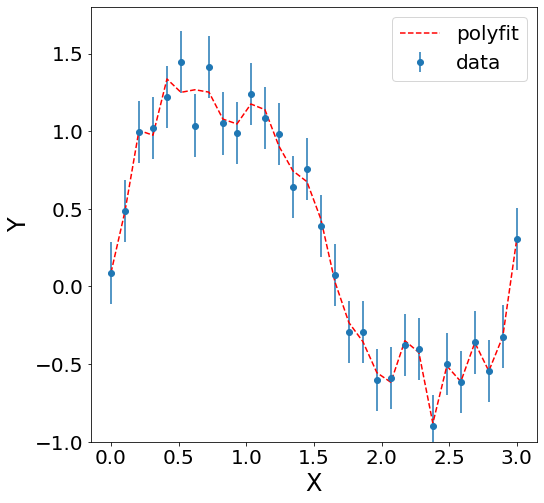

In [8]:

plt.figure( figsize = ( 8, 8 ) )

plt.errorbar( x, y, yerr = 0.2, marker = 'o', linestyle = 'none',label='data')

plt.plot( x, z(x) ,linestyle='--',color='red',label ='polyfit')
plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.xlabel( 'X', fontsize = 24)
plt.ylabel( 'Y', fontsize = 24)

plt.ylim( -1., 1.8)

### This is a clear example of: 
- A: underfitting
- B: overfitting

### you can see that the high order polynomial fits the data *very* well. Actually *too* well. It actually fits the noise in the data like it were real features (remember that we put noise on top of our 'real' sinusoidal function). 

### So how can we really tell if a model is under or overfitting our data? The best way is to test in an independent dataset how well our model works. E.g., you have N (>>1) observations use .9N to get your fit and .1N to test if your fit makes sense....

### In a way, if your fit makes sense it should also be able to predict the future behavior of your data...(ML)

Text(0, 0.5, 'Y')

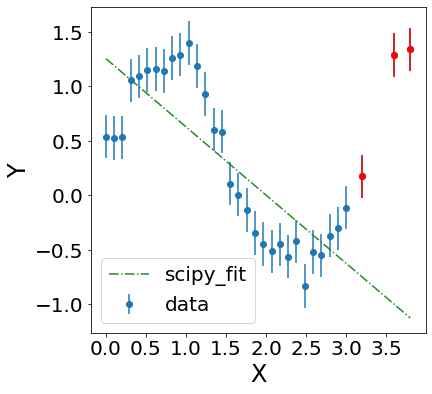

In [10]:
# make a wider model to see the real 'future' behavior
x3 = np.append(x, [3.2, 3.6, 3.8] )
y3 = np.sin(2*x3) + np.random.random(len(x3))*0.6

plt.figure( figsize = ( 6, 6 ) )

plt.errorbar( x3, y3, yerr = 0.2, marker = 'o', linestyle = 'none', label = 'data')
plt.plot( x3, t2[ 0 ] *x3 + t2 [ 1 ], linestyle = '-.', color = 'forestgreen', label ='scipy_fit')
plt.errorbar( [3.2, 3.6, 3.8] , y3[ len(x3)-3:  ], yerr = 0.2, marker = 'o', linestyle = 'none', color = 'red' )

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.xlabel('X', fontsize = 24)
plt.ylabel('Y', fontsize = 24)

In [11]:
# expand its behavior up to x = 4
qq =  t2b[ 0 ] * x3 + t2b[ 1 ] * x3**2 + t2b[ 2 ]* x3**3 + \
     t2b[ 3 ] * x3**4  + t2b[ 4 ] * x3**5 +  t2b[ 5 ] * x3**6  +  t2b[ 6 ] * x3**7    


Text(0, 0.5, 'Y')

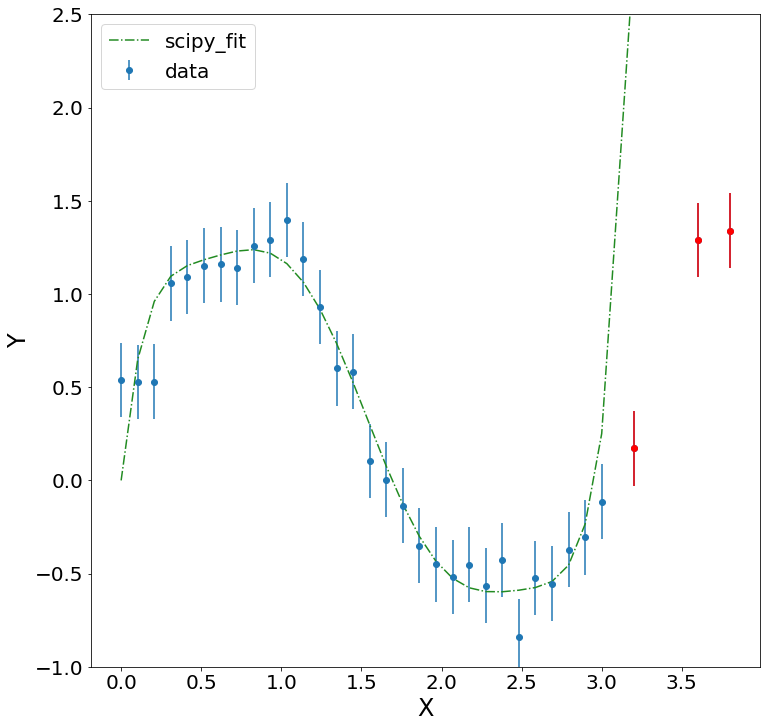

In [12]:
# make a wider model to see the real 'future' behavior and overplot the higher order polynomial:
plt.figure( figsize = ( 12, 12 ) )

plt.errorbar( x3, y3, yerr = 0.2, marker = 'o', linestyle = 'none', label = 'data')
plt.plot( x3, qq  , linestyle = '-.', color = 'forestgreen', label ='scipy_fit')
plt.errorbar( [3.2, 3.6, 3.8] , y3[ len(x3)-3:  ], yerr = 0.2, marker = 'o', linestyle = 'none', color = 'red' )

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.ylim( -1., 2.5)
plt.xlabel('X', fontsize = 24)
plt.ylabel('Y', fontsize = 24)

Text(0, 0.5, 'Y')

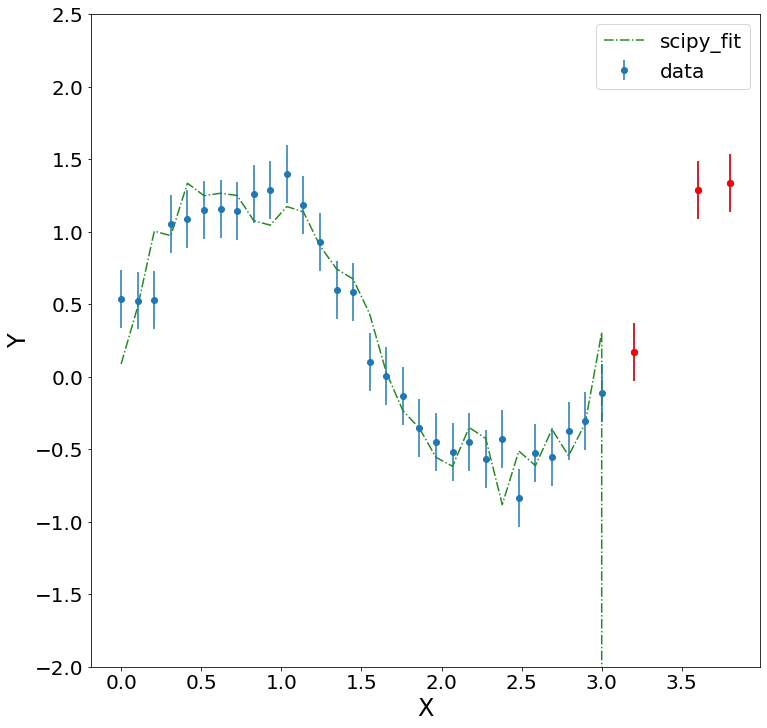

In [13]:
# go back to the 29th deg polynomial;
# make a wider model to see the real 'future' behavior and overplot the higher order polynomial:
plt.figure( figsize = ( 12, 12 ) )

plt.errorbar( x3, y3, yerr = 0.2, marker = 'o', linestyle = 'none', label = 'data')
plt.plot( x3, z(x3) , linestyle = '-.', color = 'forestgreen', label ='scipy_fit')
plt.errorbar( [3.2, 3.6, 3.8] , y3[ len(x3)-3:  ], yerr = 0.2, marker = 'o', linestyle = 'none', color = 'red' )

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.ylim( -2., 2.5)
plt.xlabel('X', fontsize = 24)
plt.ylabel('Y', fontsize = 24)

### Your model underfits your data when the model doesn't fit well the data. The model is unable to capture the relationship between the input examples x and the target values y  --> you use a too simplified model to describe what actually happens

### Your model overfits your data when it fits them a bit 'too' well....your model is too complex for the few data points you have and it is memorizing all the data, including their noise, as model inputs...


### in ML (you can go back to see the guest lecture by M. Himes) you try to figure out if you under- or over-fit your data by minimizing your cost function; a measure of how close your predicted values f(x) are to the real observed y points (a form of cost function is e.g. chi-square minimization).

### Split data in training and validation/testing dataset --> train on one, test and validate on others

### If you underfit your training dataset in ML your fit will be poor even for your training dataset; if you overfit your fit will be good for the training dataset but will be bad for fitting your testing dataset

### What do you do if you find out you under or overfit your data? Multiple things could be the problem:
- not enough training data for your model
- not accurate enough model, or more often, too complex model 
- sometimes, especially when ML is at hand, maybe you just have not captured enough observations for *all* your parameters (same true for MCMC)


### There are some cases where your fit can be horrible, but more parameters in your model only increase your fit...

In [14]:
x2 = np.linspace(0, 6, 100)*np.pi
y2 = np.cos(x2 )

In [15]:
z2 = 1 - x2**2/np.math.factorial(2) + x2**4/np.math.factorial(4) 

z2b = 1 - x2**2/np.math.factorial(2) + x2**4/np.math.factorial(4) - x2**6/np.math.factorial(6) +\
     x2**8/np.math.factorial(8) 

z2c = 1 - x2**2/np.math.factorial(2) + x2**4/np.math.factorial(4) - x2**6/np.math.factorial(6) +\
     x2**8/np.math.factorial(8) - x2**10/np.math.factorial(10) + x2**12/np.math.factorial(12)

z2d = 1 - x2**2/np.math.factorial(2) + x2**4/np.math.factorial(4) - x2**6/np.math.factorial(6) +\
     x2**8/np.math.factorial(8) - x2**10/np.math.factorial(10) + x2**12/np.math.factorial(12) - \
     x2**14/np.math.factorial(14) + x2**16/np.math.factorial(16) - x2**18/np.math.factorial(18)

(-2.0, 2.0)

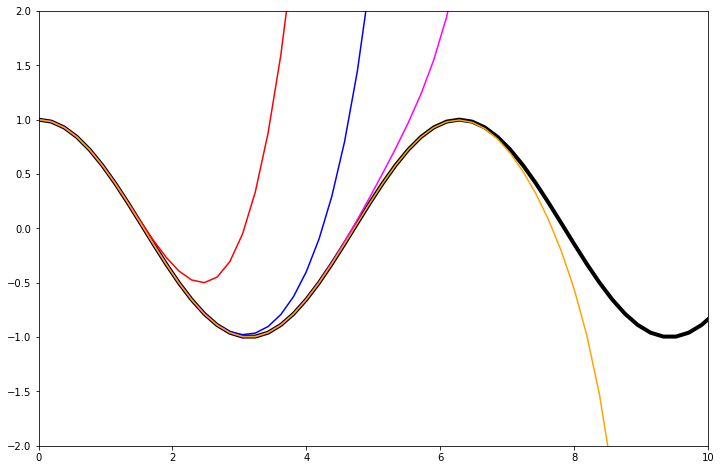

In [16]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(x2, y2,   color = 'black', linewidth = 4)
plt.plot( x2, z2,  color = 'red')
plt.plot( x2, z2b, color = 'blue')
plt.plot( x2, z2c, color = 'magenta')
plt.plot( x2, z2d, color = 'orange')

plt.xlim(0,10)
plt.ylim( -2,2)

In [17]:
import math

def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

In [18]:
angle_rad = (math.radians(145))
out = func_cos(angle_rad,5)
print(out, np.cos(angle_rad))

-0.8163216376797149 -0.8191520442889919


### 1. We have numpy arrays: 
x = np.array([0.25,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5, 2.75,3.,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25] )

y = np.array( [ 2.707, 14.667, 7.33, 13.907, 19.583, 28.559, 27.019, 32.177, 59.223, 61.353, 97.764,  
               95.65, 118.218, 149.653, 160.158, 195.923, 209.151,276.037, 296.779, 321.571, 400.611 ] )


### and error bars: 

sigma = np.array( [46.654, 80.431, 86.407, 60.667, 89.522, 120.837, 54.983, 72.334, 93.261,
                   14.128, 127.621, 121.674, 76.334, 93.644,137.65, 54.396, 51.924, 60.282,
                   109.396,125.367, 142.854] )*0.24


###  Try to fit the data with a:
- linear function $a*x+b$  (use curvefit)
- second order polynomial: $a*x^2+b*x +c$ (use curvefit)
- third order polynomial: $a*x^3 + b*x^2+c*x +d$ (use curvefit)
- sixth order polynomial: $a*x^6 + ...+f*x +g$ (use polyfit)
- tenth order polynomial: $a*x^5 +...+ e*x+ f$ (use polyfit)
- fifteenth order polynomial: $a*x^{15} +...+ n*x+ o$ (use polyfit)


### Which models do you think underfit your data? Which one seem to overfit?

In [19]:
x = np.array([0.25,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5, 2.75,3.,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25] )

y = np.array( [ 2.707, 14.667, 7.33, 13.907, 19.583, 28.559, 27.019, 32.177, 59.223, 61.353, 97.764,
95.65, 118.218, 149.653, 160.158, 195.923, 209.151,276.037, 296.779, 321.571, 400.611 ] )

sigma = np.array( [46.654, 80.431, 86.407, 60.667, 89.522, 120.837, 54.983, 72.334, 93.261, 14.128, 127.621, 121.674, 76.334, 93.644,137.65, 54.396, 51.924, 60.282, 109.396,125.367, 142.854] )*0.24



<ErrorbarContainer object of 3 artists>

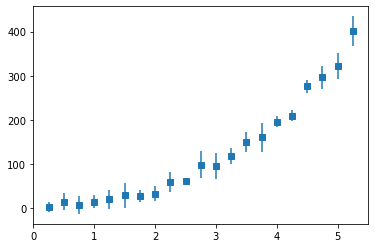

In [21]:
plt.errorbar(x,y , yerr = sigma, linestyle = 'none' , marker =  's')

In [22]:
# linear function with curve fit:

def line_fit(x, a , b):
    """Docstring"""
    
    print(f'a ={a} b={b} ')
    
    return a*x+b

a1 = curve_fit(line_fit(x,y,sigma-sigma))
a2 = curve_fit(line_fit(x,y,sigma-sigma))


a =[  2.707  14.667   7.33   13.907  19.583  28.559  27.019  32.177  59.223
  61.353  97.764  95.65  118.218 149.653 160.158 195.923 209.151 276.037
 296.779 321.571 400.611] b=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 


TypeError: curve_fit() missing 2 required positional arguments: 'xdata' and 'ydata'

       2
18.32 x - 28.54 x + 21.19


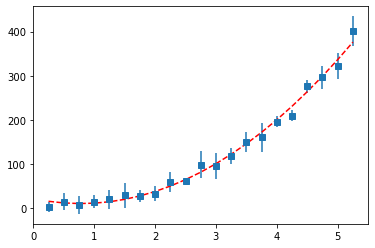

In [30]:
fit = np.polyfit(x,y,2)

p1 = np.poly1d(fit)

print(p1)


plt.errorbar(x,y , yerr= sigma , linestyle = 'none', marker ='s')
plt.plot(x , p1(x) , linestyle = '--',color = 'r')

### 2. The leap years: Write a function leap_year( t ) that takes as input a year and prints out information on whether it is a leap year or not. 

- Remember that to be a leap year, the year number must be divisible by four – except for end-of-century years, which must be divisible by 400. So you need to test the following: 
- any year that is divisible by 400 is a leap year.
- Of the remaining years, any year that is divisible by 100 is not a leap year.
- Of the remaining years, any year that is divisible by 4 is a leap year.


### Test the code out for 1980, 1986, 2000 and 1900

In [ ]:
num_to_word

for k,v in dictionary_1.items():
    
    if num == value:
        word == key
        
return word

### 3. How many days to the end of the month? Now that you know how to define a leap year make a function that when given a date (day, name of month and year) it will print an informative statement about how many days there are left in the month (so in January 15 2021 it will tell you there are 16 days left, in March 29 2022 it will tell you there are 2 days left etc). Make sure to take into account leap years! 

### Test the code out for: 12 January 2020, 2 November 2021, 2 February 2020 and 2 February 2021

### 4. It's the year 1700 and Ohm hasn't come up with his law yet. In your lab you measured the following data:
- Volt =  [  14.0, 142.0 , 34.3, 55.6, 24.2, 84.0, 48.6, 101.2, 154.6, 63.2] 
- Curr =  [0.333, 3.381, 0.809, 1.309, 0.576, 2.000, 1.157, 2.409, 3.681, 1.504 ]
- Volt_err = 2.2
- Curr_err = 0.132

### Plot your data using an error plot. What is the form that the best-fit model that fits your data should have?
### Use Curvefit to find the best-fit resistance of your circuit. Use leastsq to do the same.


### 5. Write a function that gets as input an ordered numpy array and a number and adds the number in the correct location in the ordered array. Do the same thing, but now with a list. Your functions should NOT use build in functions like sort(), sorted(), np.sort() etc

### Test it for array ar1 = np.array( [ 1, 5, 12, 88, 124, 232 ] ) and number n1 = 42 and for lists ar2 = [ 1, 4, 22, 38, 44, 52 ] and n2 = 8

### 6. Numbers to words. Make a function num_to_word that gets as input any number up to 999 and prints out its name (so if you give it 42 it will return 'Forty two', if you give it 222 it will return 'Two hundred and twenty two' etc)

### 7. Make a code that asks the user for a filename. Then it checks if a file exists. If so, it let's you know that the file exists. If not it asks the user if they want to make the file (Y/N) and proceeds to do so if the answer is Y.

### You can also make the code tell you when the file was created if it is already there.